<a href="https://colab.research.google.com/github/FlorianLngnbrg/schoolstuff/blob/main/Heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

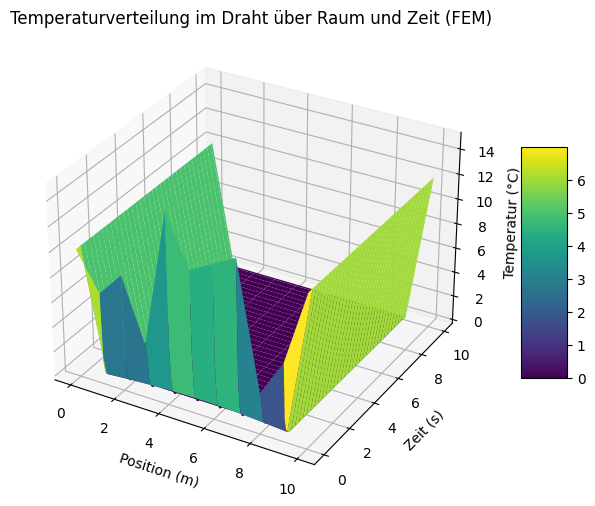

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Anzahl der Gitterpunkte entlang der x-Achse
num_points = 11  # Anzahl der Messpunkte

# Länge des Drahtes
L = 10  # in Metern

# Zeitparameter
T = 10  # Endzeit in Sekunden
num_steps = 100  # Anzahl der Zeitschritte
dt = T / num_steps  # Zeitinkrement

# Anfangsbedingungen (Temperaturen an den Messpunkten)
initial_temperatures = np.array([10, 7, 9, 4, 15, 11, 12, 13, 3, 6, 12])

# Raumdiskretisierung
x_values = np.linspace(0, L, num_points)  # Gitterpunkte entlang der x-Achse

# Finite-Elemente-Methode (FEM)
A = diags([-1, 2, -1], [-1, 0, 1], shape=(num_points - 2, num_points - 2)).toarray()
B = diags([1, 1], [-1, 1], shape=(num_points - 2, num_points - 2)).toarray()

# Anfangsbedingungen
u = initial_temperatures[1:-1]

# Speicherung der Temperaturwerte
temperature_values = [initial_temperatures]

# Zeitschleife für die Berechnung
for i in range(num_steps):
    u = spsolve(A / dt + B, u)
    temperature_values.append(np.concatenate(([initial_temperatures[0]], u, [initial_temperatures[-1]])))

# Ergebnisse anzeigen
temperature_values = np.array(temperature_values)
time_values = np.linspace(0, T, num_steps + 1)

# Erzeuge ein Gitter für den Raum und die Zeit
X, T = np.meshgrid(x_values, time_values)

# Erzeuge eine 3D-Figur
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotte die Temperaturverteilung als Oberflächenplot
surf = ax.plot_surface(X, T, temperature_values, cmap='viridis')

# Beschriftungen und Titel
ax.set_xlabel('Position (m)')
ax.set_ylabel('Zeit (s)')
ax.set_zlabel('Temperatur (°C)')
ax.set_title('Temperaturverteilung im Draht über Raum und Zeit (FEM)')

# Farbskala anzeigen
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Anzeige der 3D-Darstellung
plt.show()